In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [18]:
# Reading house data
house = pd.read_csv('kc_house_data.csv')

In [19]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [20]:
# Dropping ID
house = house.drop(['id'], axis=1)

In [21]:
# Printing house data
house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [22]:
# DESCRIPTIVE STATISTICS

In [23]:
# Print descriptive statistics for the DataFrame using .describe() 
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Print descriptive statistics for the DataFrame using  .info()
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

<AxesSubplot:>

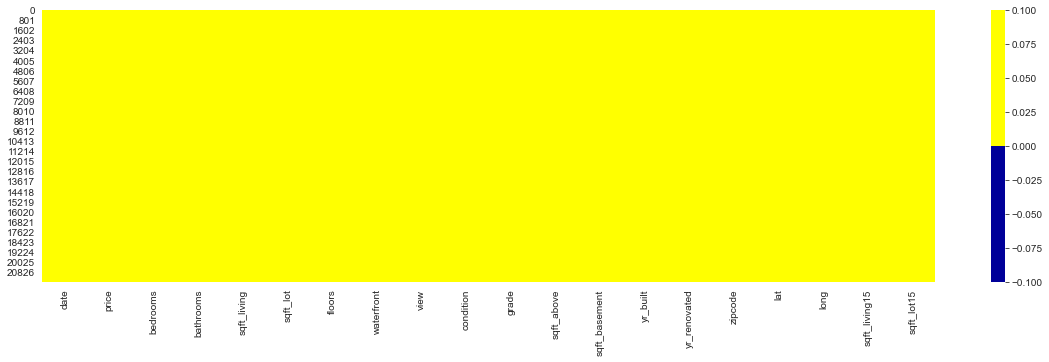

In [7]:
# Finding missing data
cols = house.columns[:20] # first 20 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is missing.
sns.heatmap(house[cols].isnull(), cmap=sns.color_palette(colours))

<AxesSubplot:>

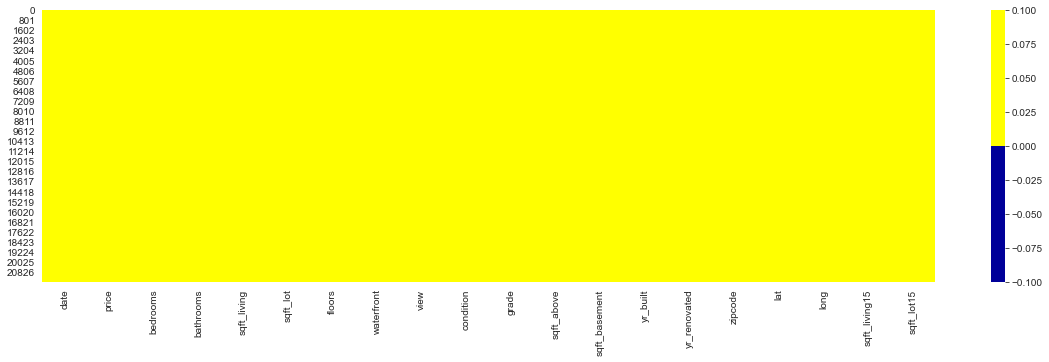

In [22]:
# Finding missing data
cols = house.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is missing.
sns.heatmap(house[cols].isnull(), cmap=sns.color_palette(colours)) 

In [ ]:
# EDA

<AxesSubplot:>

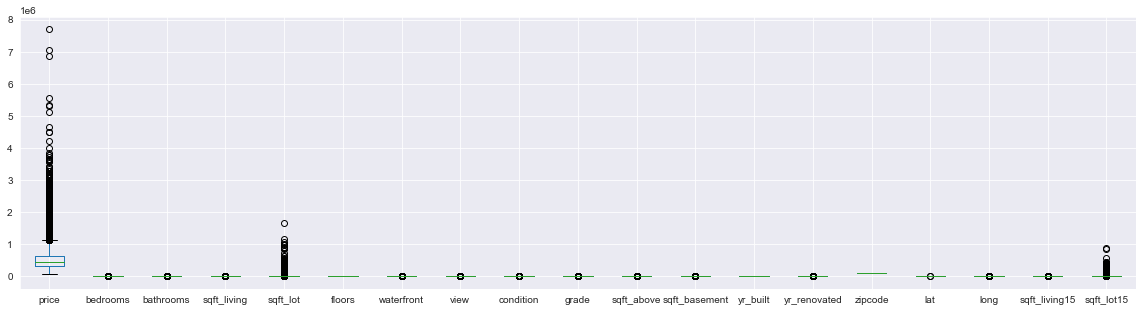

In [18]:
# Box plot all variables
house.plot(kind='box')

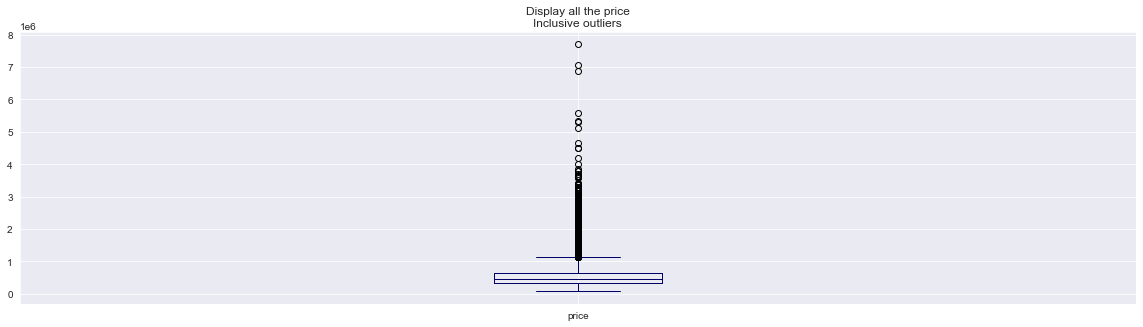

In [10]:
# Box plot price
house['price'].plot.box(by='price', color = '#000066')
plt.title('Display all the price\nInclusive outliers')
plt.show()

<AxesSubplot:ylabel='price'>

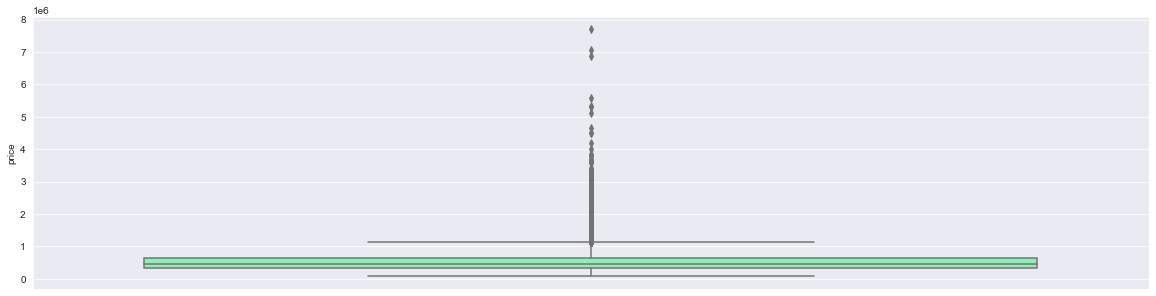

In [30]:
# Box plot price
sns.boxplot(y="price", data=house, palette='rainbow')

<AxesSubplot:ylabel='Frequency'>

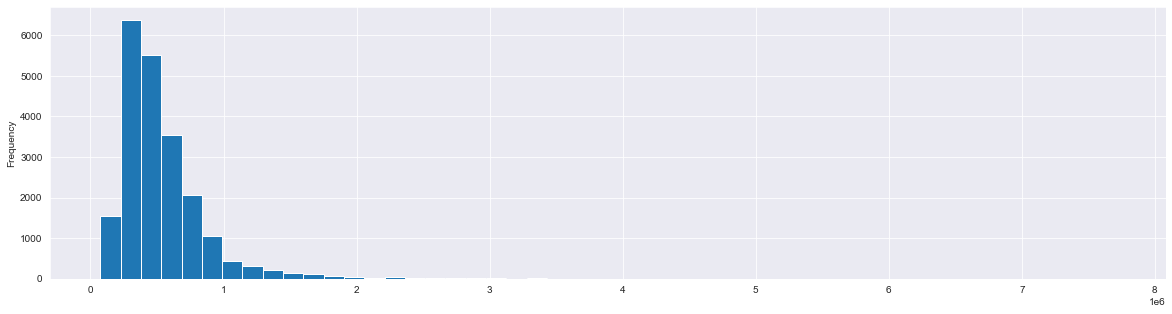

In [40]:
# Histogram of price variable
house['price'].plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Density'>

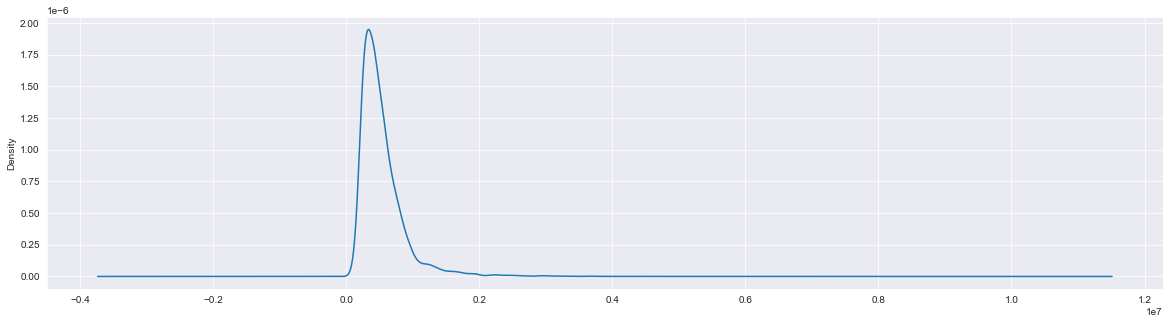

In [41]:
# kde plot for price, Kernal Density Estimate, the probability density of a continuous variable
house['price'].plot(kind='kde')

In [31]:
# Maximum price for house dataframe
house.price.max()

7700000.0

Text(0.5, 1.0, 'Box Plot Bedrooms')

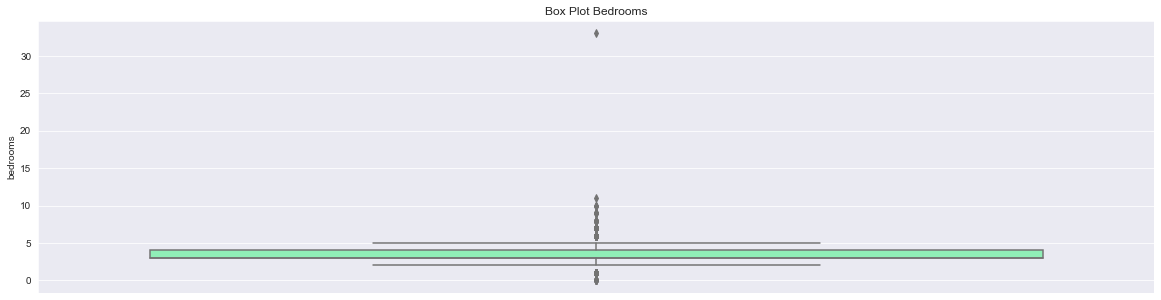

In [6]:
# Box plot bedrooms
sns.boxplot(y="bedrooms", data=house, palette='rainbow')
plt.title('Box Plot Bedrooms')

<AxesSubplot:ylabel='bathrooms'>

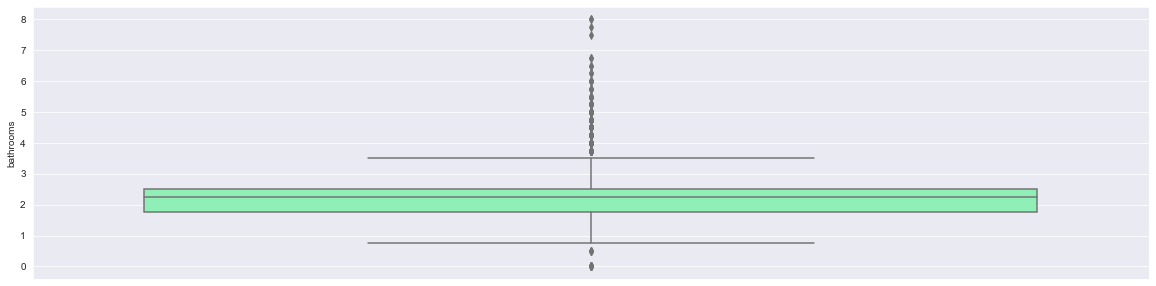

In [20]:
# Box plot bathrooms
sns.boxplot(y="bathrooms", data=house, palette='rainbow')

<AxesSubplot:ylabel='sqft_living'>

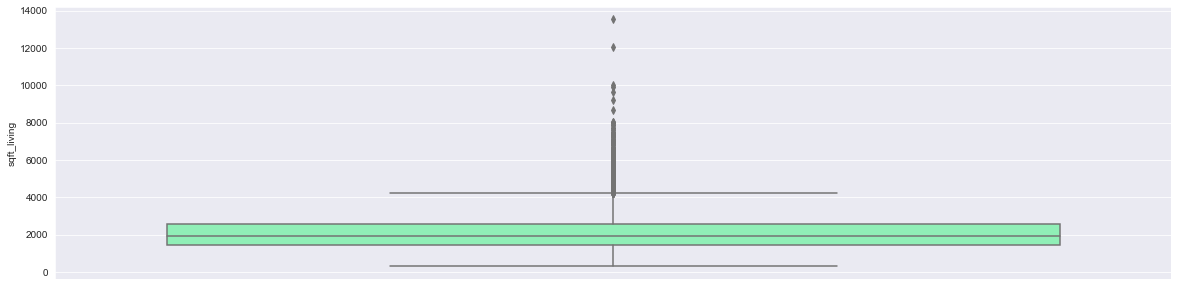

In [11]:
# Box plot sqft_living
sns.boxplot(y="sqft_living", data=house, palette='rainbow')

<AxesSubplot:ylabel='sqft_lot'>

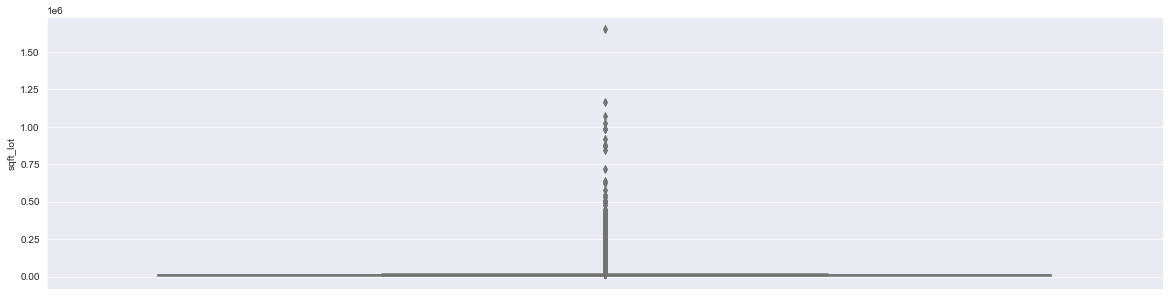

In [12]:
# Box plot sqft_lot
sns.boxplot(y="sqft_lot", data=house, palette='rainbow')

<AxesSubplot:ylabel='floors'>

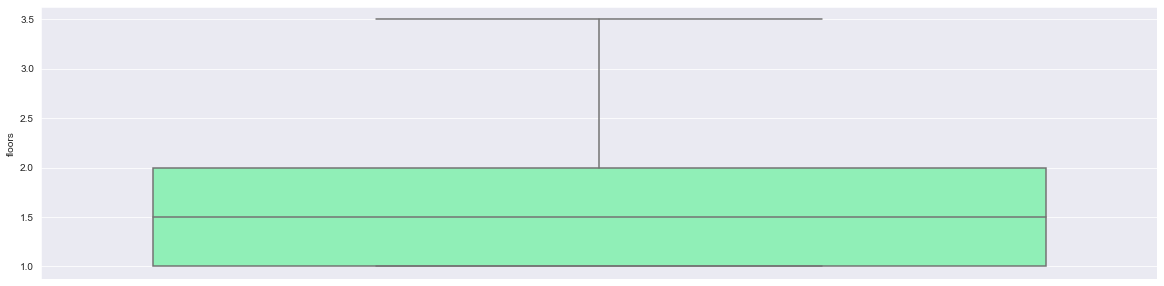

In [15]:
sns.boxplot(y="floors", data=house, palette='rainbow')

<AxesSubplot:ylabel='waterfront'>

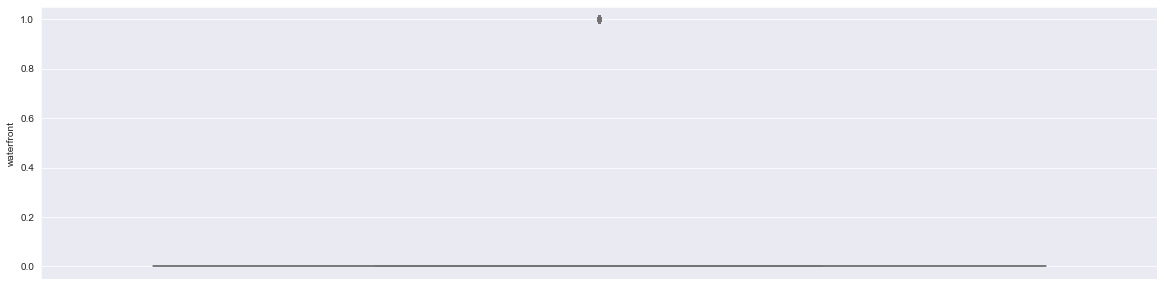

In [16]:
sns.boxplot(y="waterfront", data=house, palette='rainbow')

<AxesSubplot:ylabel='view'>

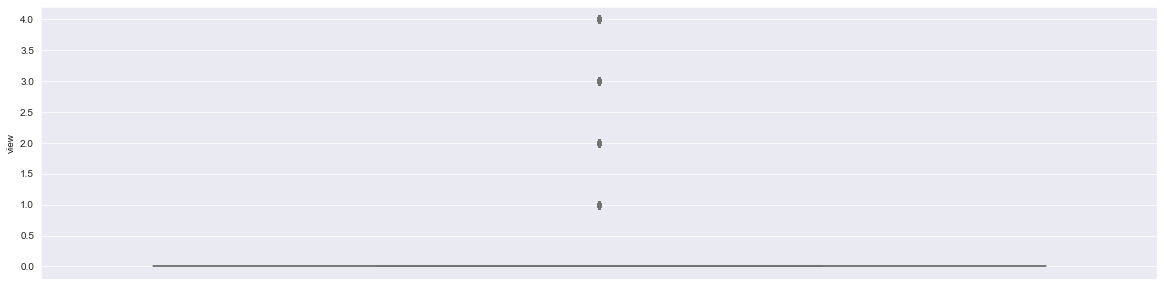

In [17]:
sns.boxplot(y="view", data=house, palette='rainbow')

<AxesSubplot:ylabel='condition'>

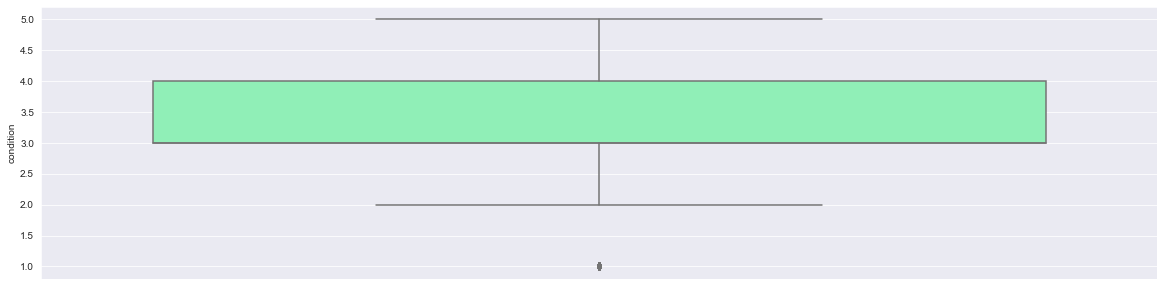

In [18]:
sns.boxplot(y="condition", data=house, palette='rainbow')

<AxesSubplot:ylabel='grade'>

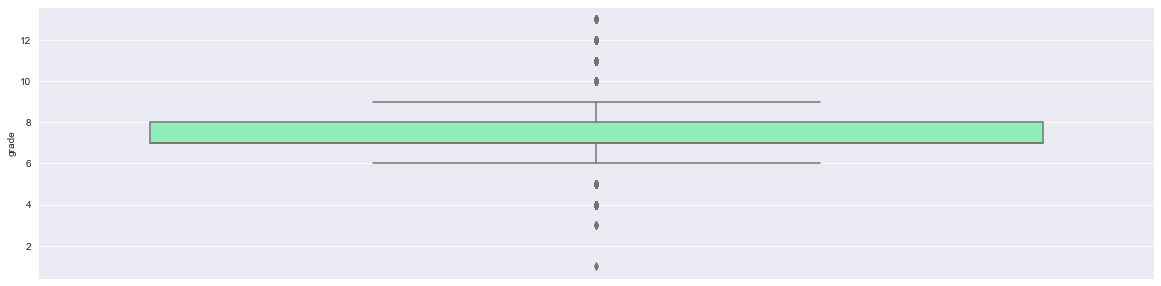

In [19]:
sns.boxplot(y="grade", data=house, palette='rainbow')

<AxesSubplot:ylabel='sqft_above'>

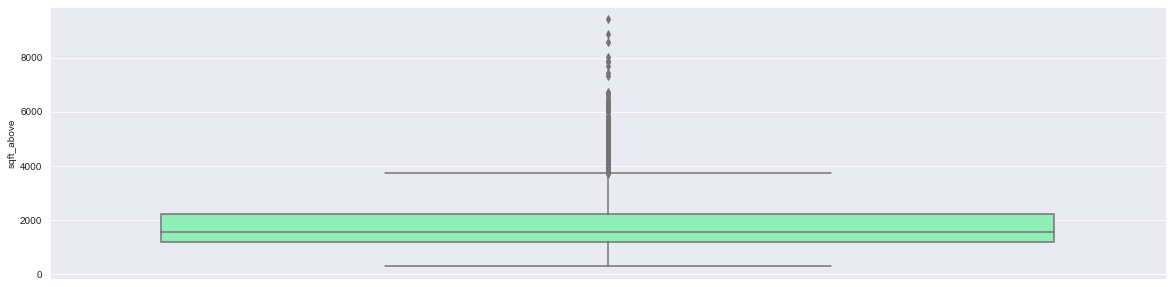

In [20]:
sns.boxplot(y="sqft_above", data=house, palette='rainbow')

<AxesSubplot:ylabel='sqft_basement'>

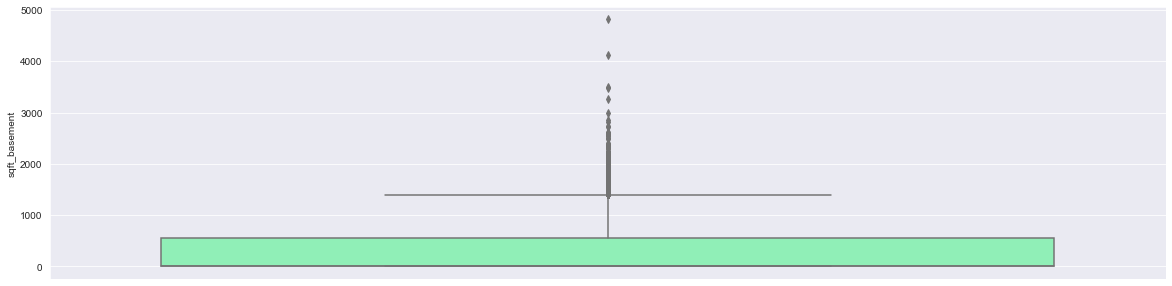

In [21]:
sns.boxplot(y="sqft_basement", data=house, palette='rainbow')

<AxesSubplot:ylabel='yr_built'>

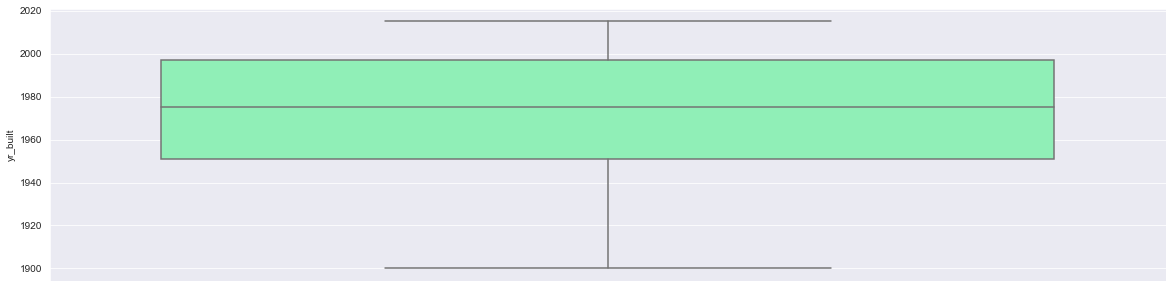

In [22]:
sns.boxplot(y="yr_built", data=house, palette='rainbow')

<AxesSubplot:ylabel='yr_renovated'>

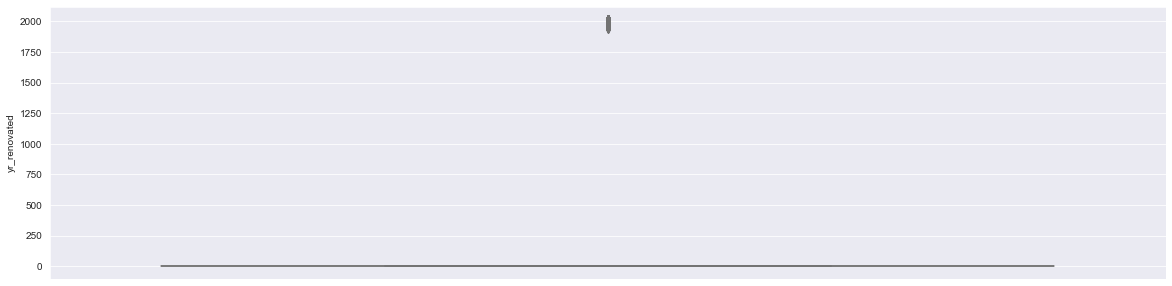

In [24]:
sns.boxplot(y="yr_renovated", data=house, palette='rainbow')

<AxesSubplot:ylabel='zipcode'>

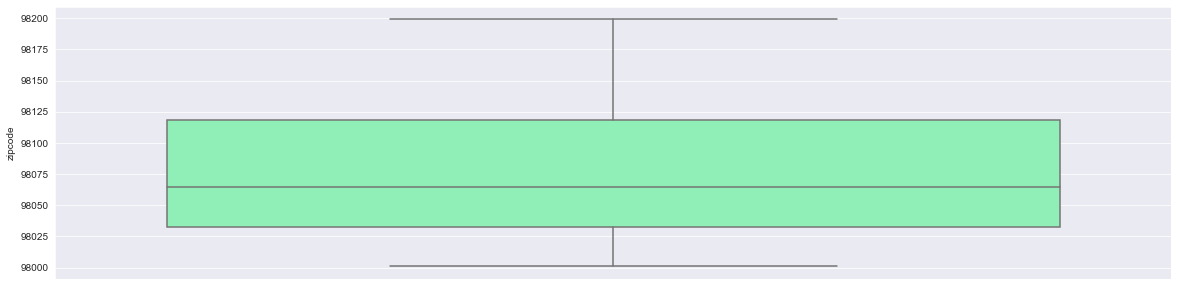

In [25]:
sns.boxplot(y="zipcode", data=house, palette='rainbow')

<AxesSubplot:ylabel='lat'>

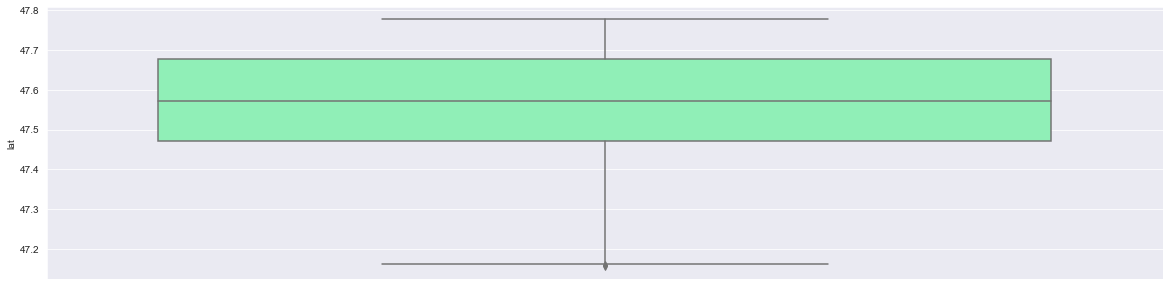

In [26]:
sns.boxplot(y="lat", data=house, palette='rainbow')

<AxesSubplot:ylabel='long'>

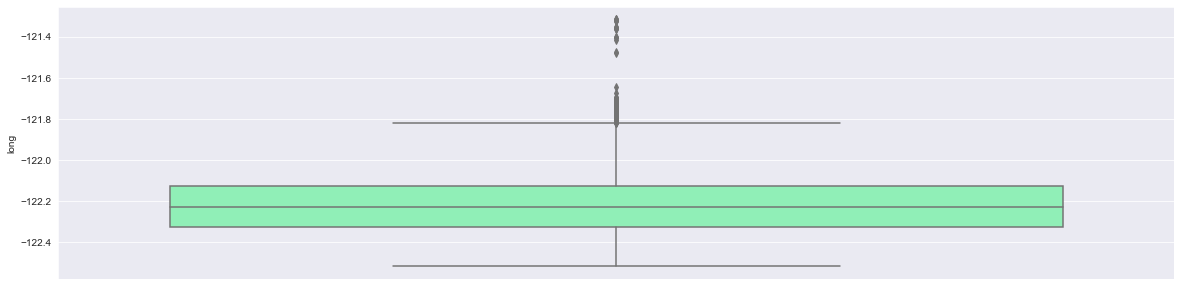

In [27]:
sns.boxplot(y="long", data=house, palette='rainbow')

<AxesSubplot:ylabel='sqft_living15'>

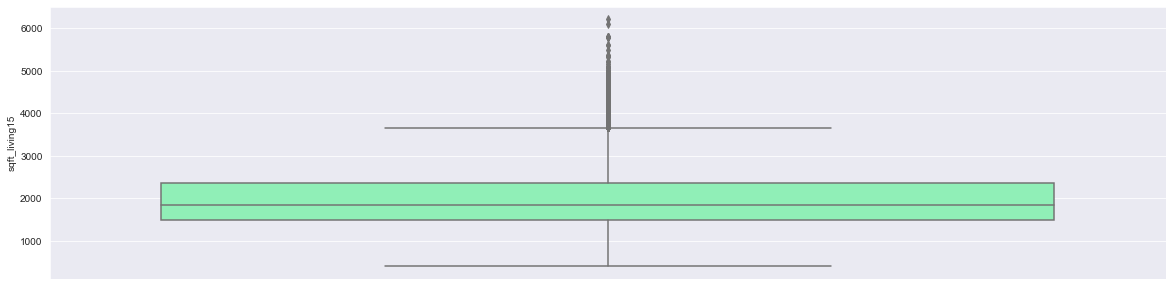

In [28]:
sns.boxplot(y="sqft_living15", data=house, palette='rainbow')

<AxesSubplot:ylabel='sqft_lot15'>

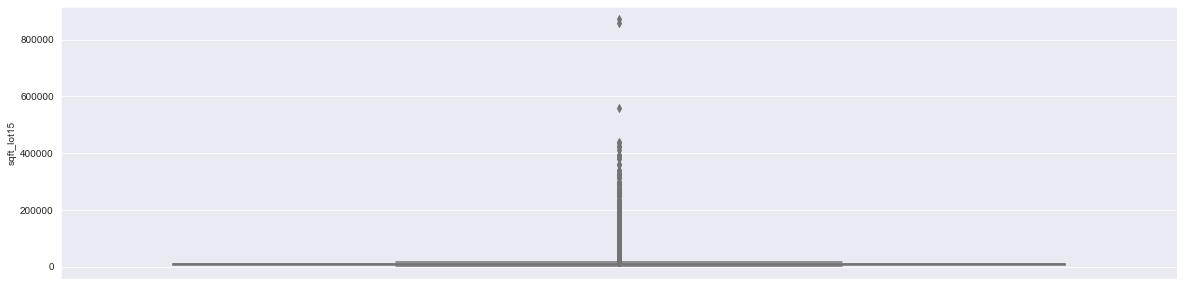

In [29]:
sns.boxplot(y="sqft_lot15", data=house, palette='rainbow')

In [10]:
filter = house['bedrooms'] == 33
house = house[~filter]


<AxesSubplot:ylabel='Frequency'>

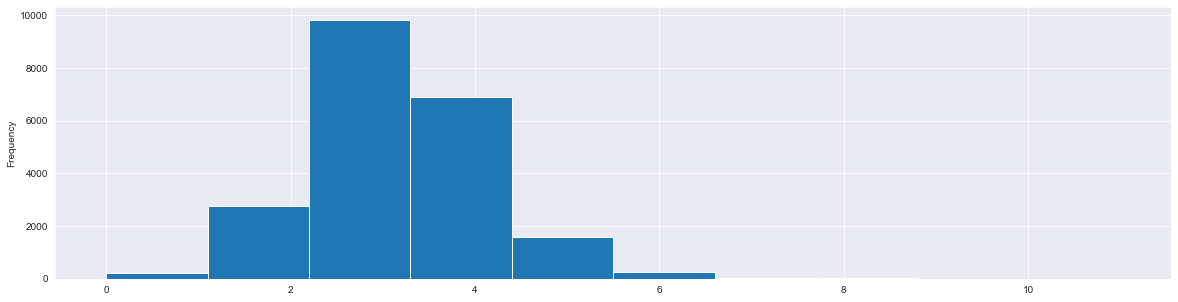

In [11]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['bedrooms'].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

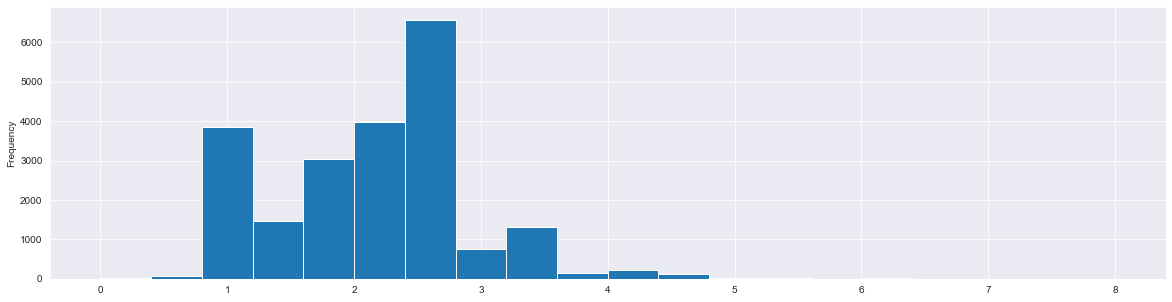

In [54]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
# What is a .75 bathroom?
house['bathrooms'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

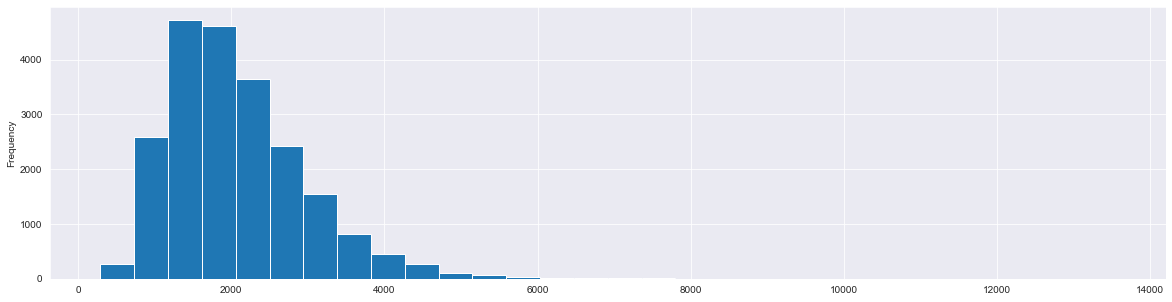

In [56]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['sqft_living'].plot(kind='hist', bins=30)

<AxesSubplot:ylabel='Frequency'>

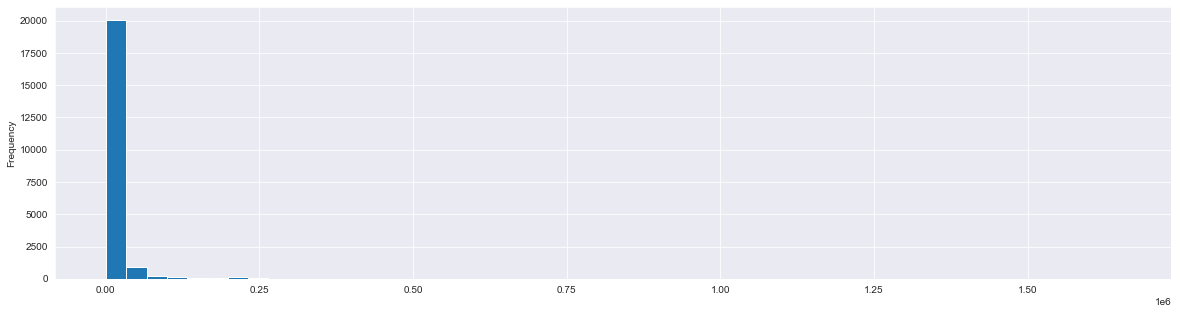

In [59]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['sqft_lot'].plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Frequency'>

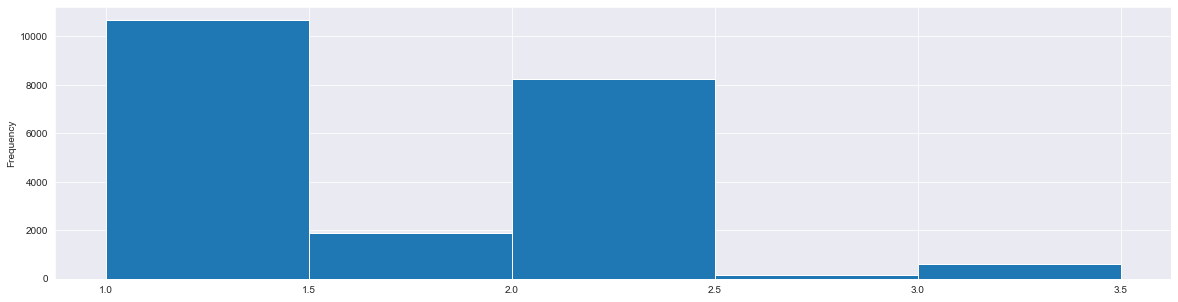

In [62]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['floors'].plot(kind='hist', bins=5)

<AxesSubplot:ylabel='Frequency'>

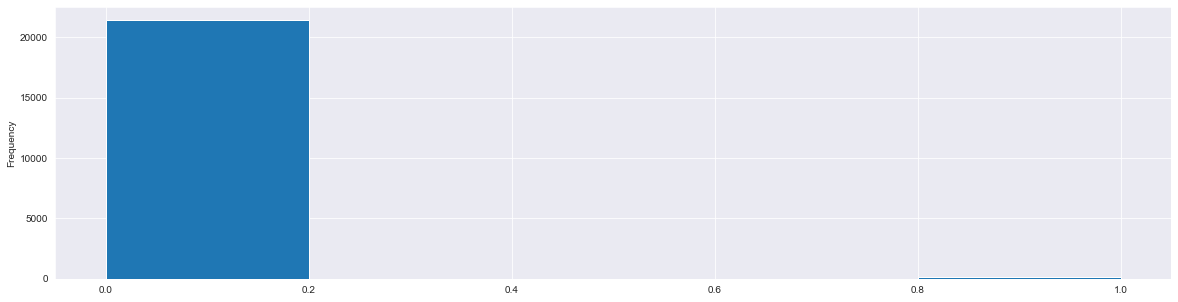

In [65]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['waterfront'].plot(kind='hist', bins=5)

<AxesSubplot:ylabel='Frequency'>

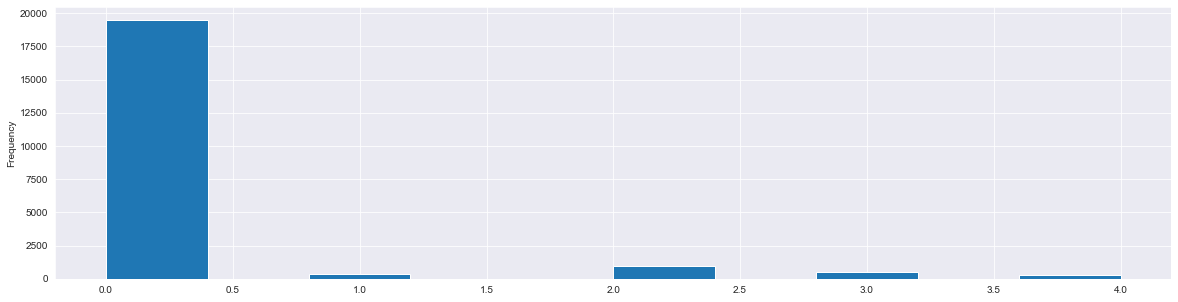

In [69]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['view'].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

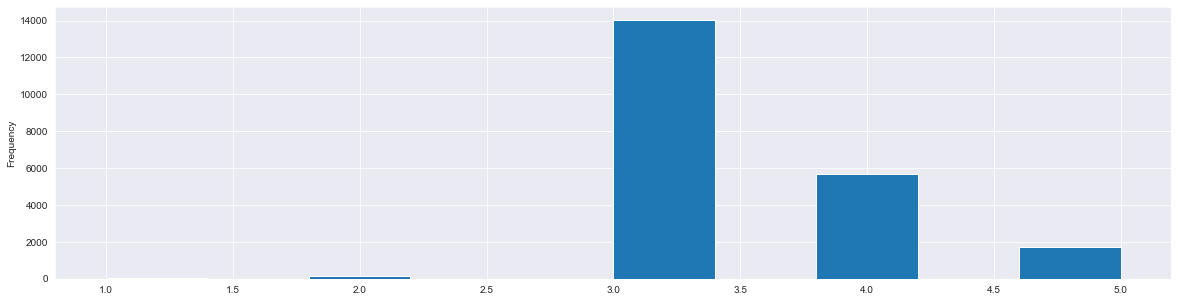

In [70]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['condition'].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

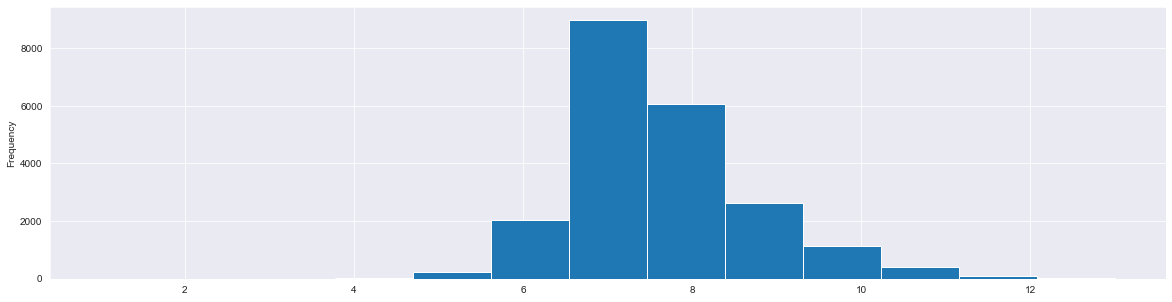

In [73]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['grade'].plot(kind='hist', bins=13)

<AxesSubplot:ylabel='Frequency'>

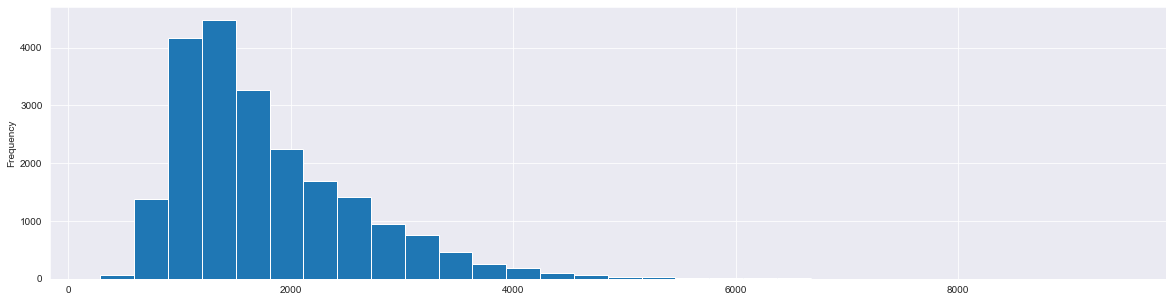

In [76]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['sqft_above'].plot(kind='hist', bins=30)

<AxesSubplot:ylabel='Frequency'>

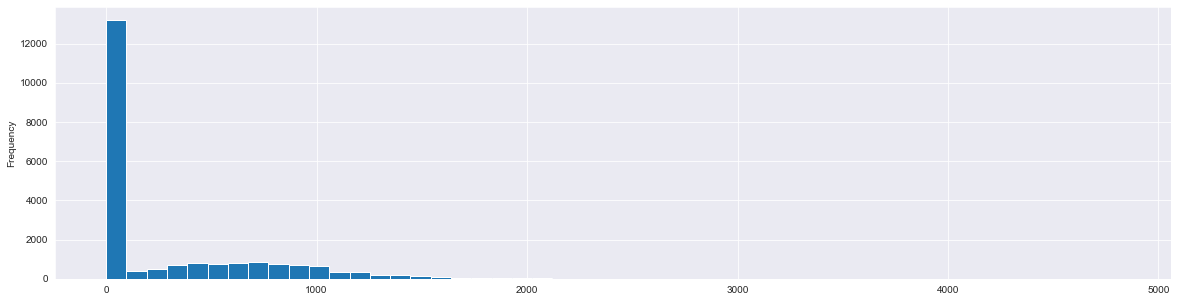

In [78]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['sqft_basement'].plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Frequency'>

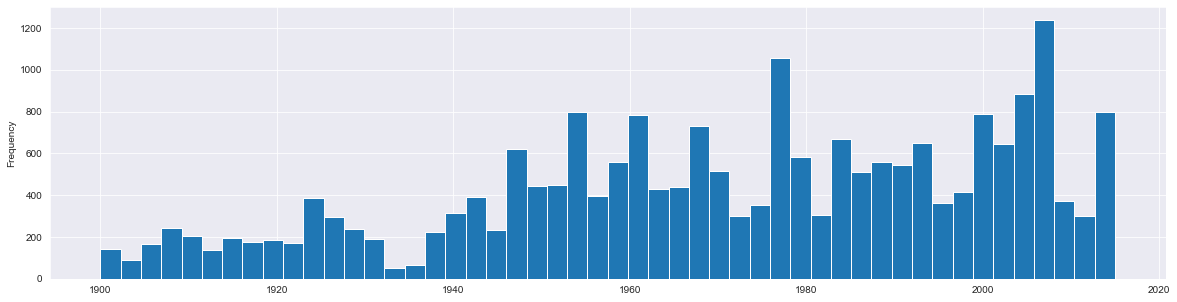

In [81]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['yr_built'].plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Frequency'>

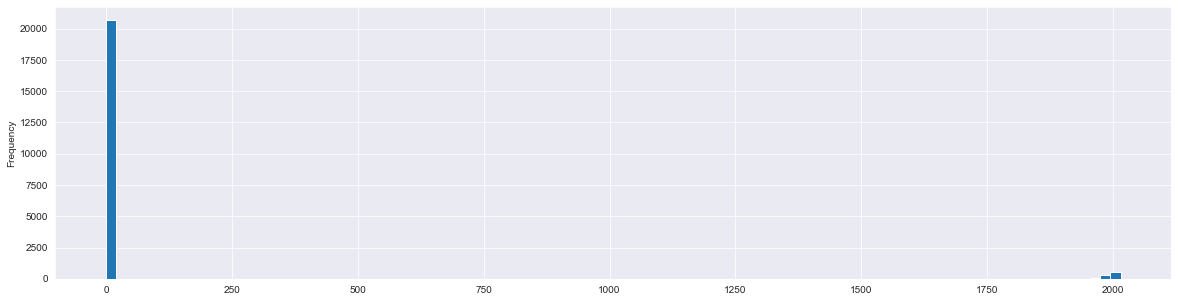

In [87]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['yr_renovated'].plot(kind='hist', bins=100)

In [92]:
filter1 = house['yr_renovated'] == 0
house1 = house[~filter1]

<AxesSubplot:ylabel='Frequency'>

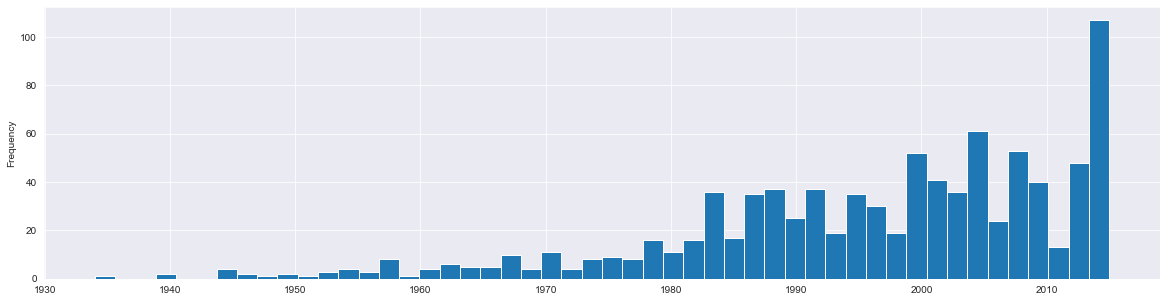

In [93]:
house1['yr_renovated'].plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Frequency'>

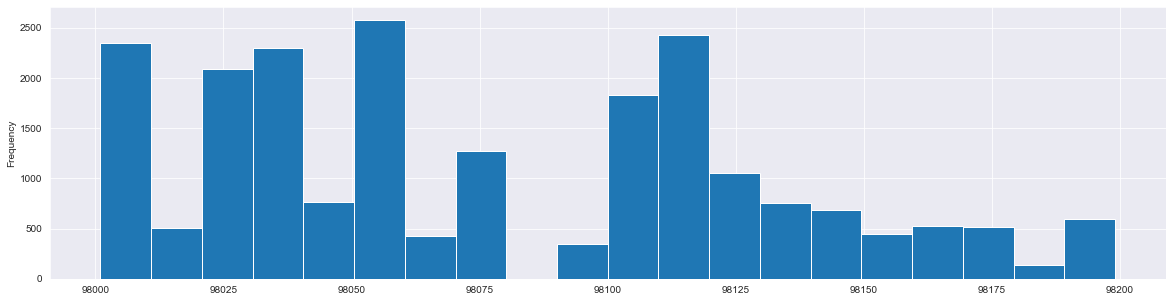

In [95]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['zipcode'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

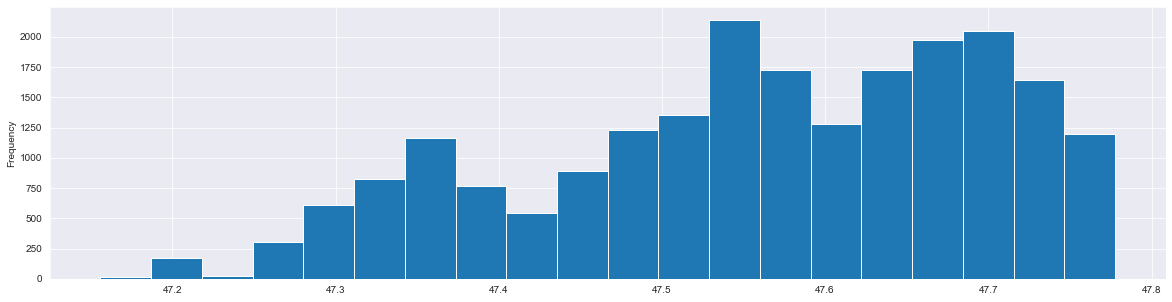

In [96]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['lat'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

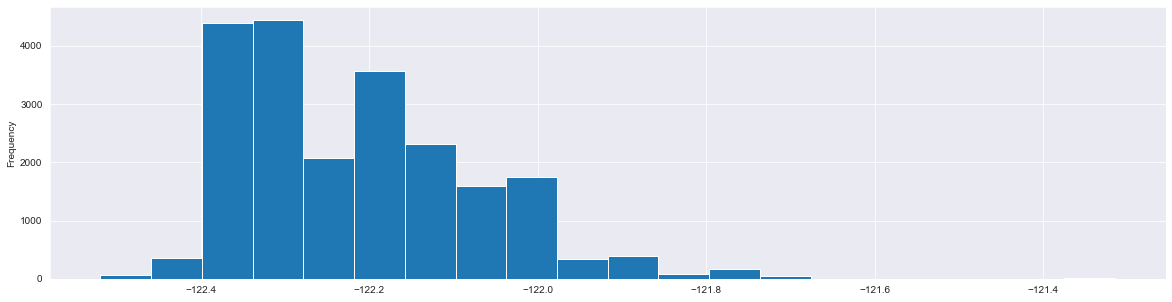

In [98]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['long'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

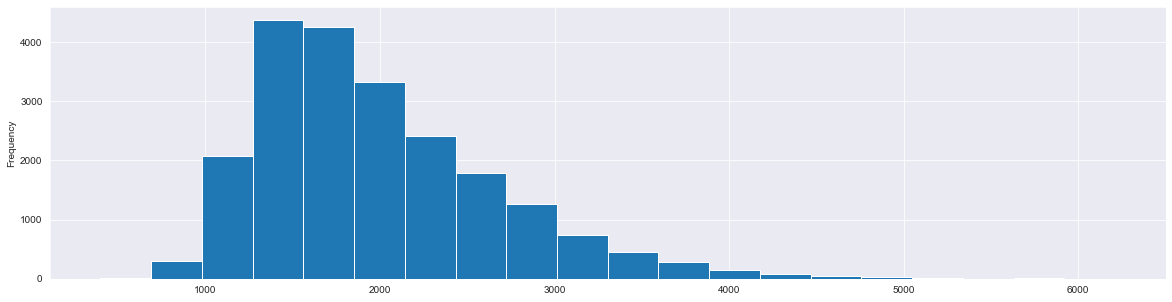

In [99]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['sqft_living15'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

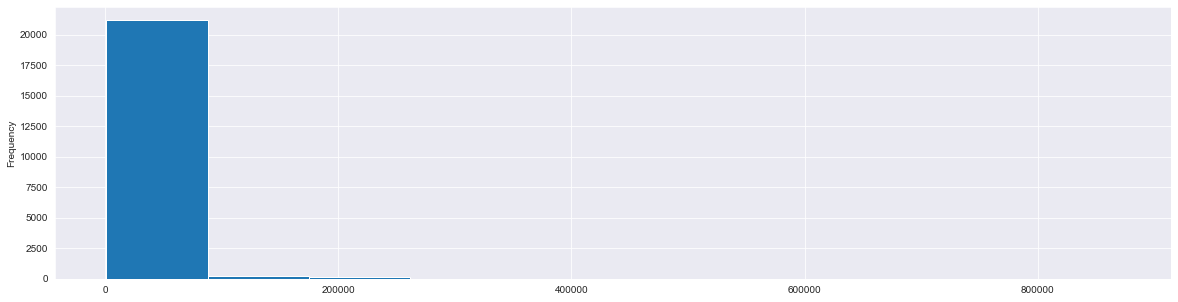

In [12]:
# Histograms of Price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
house['sqft_lot15'].plot(kind='hist', bins=10)

<AxesSubplot:>

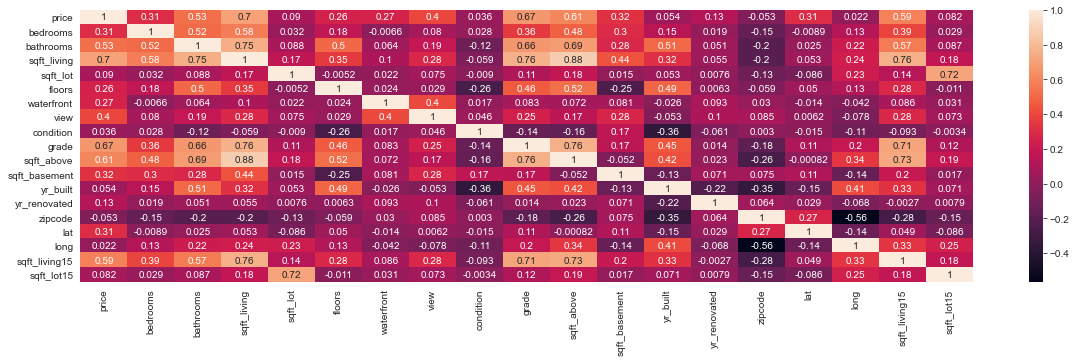

In [24]:
# Correlation of house variables
corr_house = house.corr()
sns.heatmap(corr_house, annot=True)

In [9]:
corr_house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [10]:
# Sorting the correlation dataset by price, descending
corr_house.sort_values(by=['price'], ascending=False, inplace=True)
corr_house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_living15,0.585379,0.391638,0.568634,0.756420,0.144608,0.279885,0.086463,0.280439,-0.092824,0.713202,0.731870,0.200355,0.326229,-0.002673,-0.279033,0.048858,0.334605,1.000000,0.183192
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
lat,0.307003,-0.008931,0.024573,0.052529,-0.085683,0.049614,-0.014274,0.006157,-0.014941,0.114084,-0.000816,0.110538,-0.148122,0.029398,0.267048,1.000000,-0.135512,0.048858,-0.086419


In [11]:
# Selecting the price column
corr_house['price']

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [12]:
Corr_house_sorted = corr_house['price'].sort_values(ascending=False)
Corr_house_sorted

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

<AxesSubplot:>

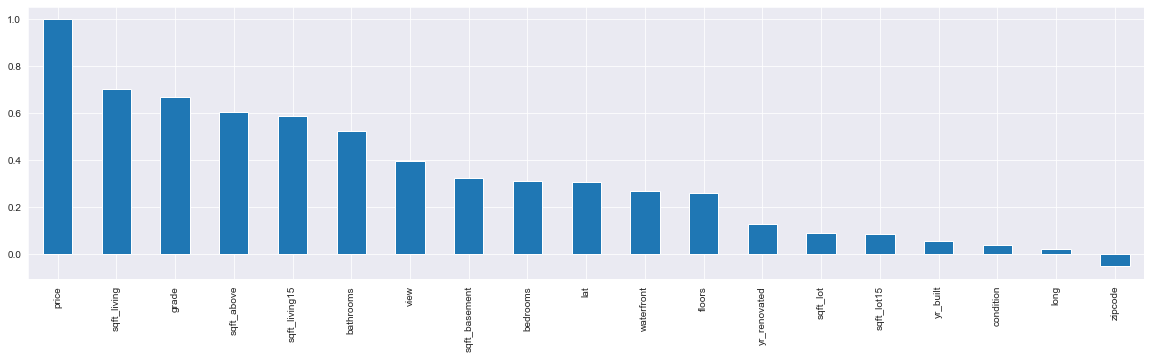

In [13]:
# Bar Plot of the Price column
corr_house['price'].plot(kind='bar')


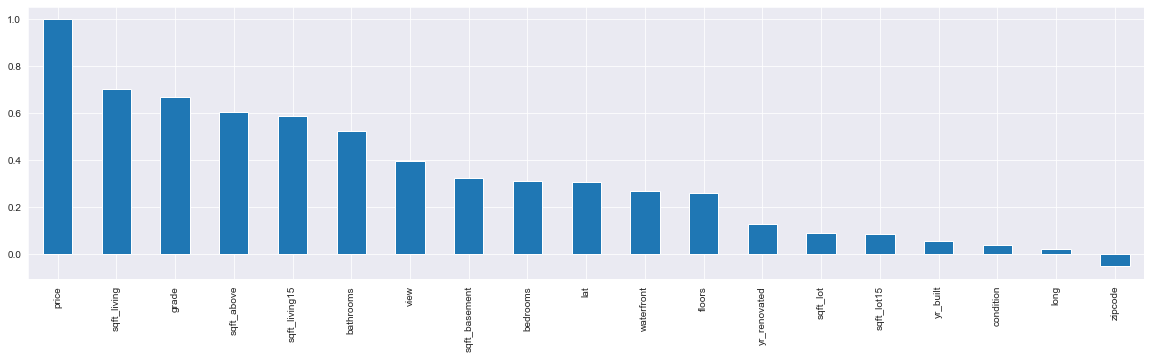

In [14]:
# Bar Plot of the Price column
corr_house['price'].plot(kind='bar')
plt.savefig('filename.png', dpi=300)

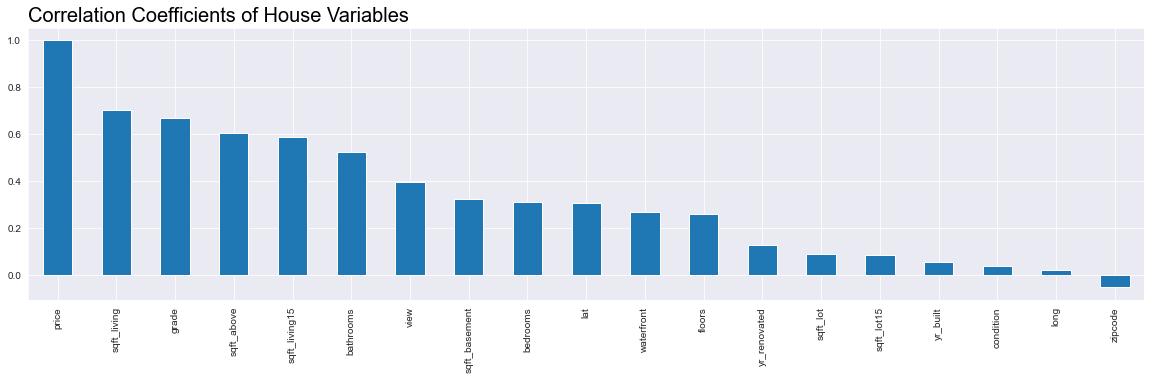

In [15]:
# Bar Plot of the Price column in correlation
corr_house['price'].plot(kind='bar')
plt.title('Correlation Coefficients of House Variables', fontsize='20', color='black', loc='left')
plt.savefig('filename.png', dpi=600)

In [13]:
# Subsetting house and keeping price less than 1000000 
house2 = house[house['price'] < 1000000]
house2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
# max value of price in house2
house2['price'].max()

999999.0

In [15]:
# correlation for house2
house2.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.294941,0.440146,0.604542,0.094614,0.268955,0.051192,0.212265,0.031555,0.616925,0.515870,0.222081,0.060899,0.075094,-0.018887,0.440753,0.078806,0.549381,0.082346
bedrooms,0.294941,1.000000,0.503464,0.603498,0.024749,0.156057,-0.032904,0.031481,0.022013,0.325477,0.477500,0.287709,0.166158,0.001828,-0.153748,-0.036371,0.144492,0.380674,0.021177
bathrooms,0.440146,0.503464,1.000000,0.711555,0.061651,0.501465,-0.009146,0.081812,-0.139655,0.606306,0.632745,0.216376,0.549940,0.020384,-0.210803,-0.016936,0.249371,0.520935,0.061519
sqft_living,0.604542,0.603498,0.711555,1.000000,0.156750,0.336238,0.002359,0.150824,-0.075003,0.693523,0.850020,0.373172,0.357078,0.016749,-0.209885,-0.000011,0.289630,0.731734,0.170426
sqft_lot,0.094614,0.024749,0.061651,0.156750,1.000000,-0.018685,0.026310,0.082077,-0.002238,0.089537,0.159089,0.012969,0.040575,0.012656,-0.128984,-0.096220,0.217866,0.140934,0.706290
floors,0.268955,0.156057,0.501465,0.336238,-0.018685,1.000000,-0.005735,-0.016942,-0.279151,0.456686,0.527939,-0.300989,0.515827,-0.006017,-0.066741,0.032814,0.137168,0.266769,-0.022997
waterfront,0.051192,-0.032904,-0.009146,0.002359,0.026310,-0.005735,1.000000,0.301291,0.013728,-0.013841,-0.006034,0.015038,-0.039923,0.053682,0.045277,-0.046504,-0.062081,0.002898,0.032954
view,0.212265,0.031481,0.081812,0.150824,0.082077,-0.016942,0.301291,1.000000,0.029194,0.116777,0.055965,0.183516,-0.066707,0.057479,0.101214,-0.033690,-0.076801,0.169379,0.078417
condition,0.031555,0.022013,-0.139655,-0.075003,-0.002238,-0.279151,0.013728,0.029194,1.000000,-0.172136,-0.179825,0.176447,-0.349954,-0.060413,-0.007226,-0.019833,-0.097706,-0.122839,0.002941
grade,0.616925,0.325477,0.606306,0.693523,0.089537,0.456686,-0.013841,0.116777,-0.172136,1.000000,0.699872,0.064420,0.498344,-0.024673,-0.188084,0.076804,0.231794,0.661670,0.098757


In [16]:
# Dropping: sqft_lot, condition, sqft_above, yr_built, yr_renovated, Zipcode, lat, long, sqft_lot15 columns
# Keeping: price, bedrooms, bathrooms, sqft_living, floors, waterfront, view, grade, sqft_basement, sqft_living15 columns
house3 = house2.drop(['sqft_lot', 'condition', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15'], axis=1)
house3.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,sqft_living15
0,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,7,0,1340
1,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,7,400,1690
2,20150225T000000,180000.0,2,1.00,770,1.0,0,0,6,0,2720
3,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,7,910,1360
4,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,8,0,1800


In [26]:
# house3 independent variables
x = house3[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_basement', 'sqft_living15']]
# house3 dependent variable
y = house3['price']
# Add constant to independent variables
x = sm.add_constant(x)
# Regression model house3 dataframe
regression_model_house3 = sm.OLS(y,x).fit() 
# Print summary
regression_model_house3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     1978.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:18:54   Log-Likelihood:            -2.6730e+05
No. Observations:               20120   AIC:                         5.346e+05
Df Residuals:                   20110   BIC:                         5.347e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.604e+05   9511.586    -27.378      0.000   -2.79e+05   -2.42e+05
bedrooms      -7062.6133   1473.757     -4.792      0.000   -9951.298   -4173.929
bathrooms     -2.108e+04   2299.444     -9.167      0.000   -2.56e+04   -1.66e+04
sqft_living      64.1358      2.948     21.753      0.000      58.357      69.915
floors         2.291e+04   2570.777      8.911      0.000    1.79e+04    2.79e+04
waterfront     9.295e+04   1.97e+04      4.719      0.000    5.43e+04    1.32e+05
view           2.804e+04   1765.274     15.884      0.000    2.46e+04    3.15e+04
grade          7.118e+04   1573.732     45.227      0.000    6.81e+04    7.43e+04
sqft_basement    57.5693      3.282     17.539      0.000      51.135      64.003
sqft_living15    42.4017      2.689     15.769      0.000      37.131      47.672
==============================================================================
Omnibus:                      725.250   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              806.902
Skew:                           0.476   Prob(JB):                    6.07e-176
Kurtosis:                       3.239   Cond. No.                     5.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Regression model with nine variables including sqft_living15
house = pd.read_csv('kc_house_data.csv')
# house independent variables
x = house[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_basement', 'sqft_living15']]
# house dependent variable
y = house['price']
# Add constant to independent variables
x = sm.add_constant(x)
# Regression model house dataframe
regression_model_house = sm.OLS(y,x).fit() 
# Print summary
regression_model_house.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     3544.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:44:47   Log-Likelihood:            -2.9781e+05
No. Observations:               21613   AIC:                         5.956e+05
Df Residuals:                   21603   BIC:                         5.957e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.952e+05   1.44e+04    -34.457      0.000   -5.23e+05   -4.67e+05
bedrooms      -2.934e+04   2171.351    -13.513      0.000   -3.36e+04   -2.51e+04
bathrooms     -1.768e+04   3523.403     -5.018      0.000   -2.46e+04   -1.08e+04
sqft_living     179.8455      4.114     43.716      0.000     171.782     187.909
floors        -1.018e+04   3974.509     -2.561      0.010    -1.8e+04   -2389.885
waterfront     5.879e+05   2.01e+04     29.266      0.000    5.49e+05    6.27e+05
view           6.123e+04   2427.832     25.219      0.000    5.65e+04     6.6e+04
grade          1.004e+05   2392.682     41.950      0.000    9.57e+04    1.05e+05
sqft_basement    45.1901      4.827      9.362      0.000      35.729      54.652
sqft_living15     6.1645      3.863      1.596      0.111      -1.407      13.736
==============================================================================
Omnibus:                    15557.695   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           901418.455
Skew:                           2.878   Prob(JB):                         0.00
Kurtosis:                      34.110   Cond. No.                     3.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# Extract coefficients from regression model 
house_coeff = (regression_model_house.params)
house_coeff

const           -495200.399562
bedrooms         -29342.371703
bathrooms        -17679.731630
sqft_living         179.845491
floors           -10180.216134
waterfront       587903.976594
view              61226.523113
grade            100372.336921
sqft_basement        45.190129
sqft_living15         6.164534
dtype: float64

In [28]:
# Sort coefficients from regression model
house_coeff_sorted = house_coeff.sort_values(ascending=False)
house_coeff_sorted

waterfront       587903.976594
grade            100372.336921
view              61226.523113
sqft_living         179.845491
sqft_basement        45.190129
sqft_living15         6.164534
floors           -10180.216134
bathrooms        -17679.731630
bedrooms         -29342.371703
const           -495200.399562
dtype: float64

Text(0.5, 1.0, 'Regression Model Coefficients of  house')

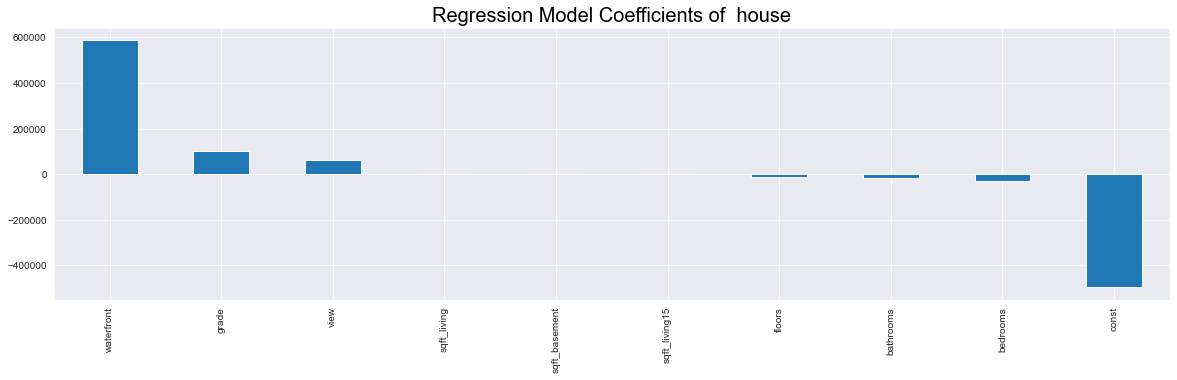

In [29]:
#Sorted Values bar plot
house_coeff_sorted.plot(kind='bar')
plt.title('Regression Model Coefficients of  house', fontsize='20', color='black')

In [21]:
# Regression model with eight variables
house = pd.read_csv('kc_house_data.csv')
# house independent variables, eight variables
x = house[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_basement']]
# house dependent variable
y = house['price']
# Add constant to independent variables
x = sm.add_constant(x)
# Regression model house dataframe
regression_model_house = sm.OLS(y,x).fit() 
# Print summary
regression_model_house.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     3986.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:45:52   Log-Likelihood:            -2.9781e+05
No. Observations:               21613   AIC:                         5.956e+05
Df Residuals:                   21604   BIC:                         5.957e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.954e+05   1.44e+04    -34.469      0.000   -5.24e+05   -4.67e+05
bedrooms      -2.939e+04   2171.249    -13.535      0.000   -3.36e+04   -2.51e+04
bathrooms     -1.776e+04   3523.156     -5.041      0.000   -2.47e+04   -1.09e+04
sqft_living     182.7621      3.686     49.586      0.000     175.538     189.986
floors        -1.112e+04   3930.638     -2.829      0.005   -1.88e+04   -3417.130
waterfront     5.868e+05   2.01e+04     29.228      0.000    5.47e+05    6.26e+05
view            6.17e+04   2409.566     25.607      0.000     5.7e+04    6.64e+04
grade          1.015e+05   2290.496     44.303      0.000     9.7e+04    1.06e+05
sqft_basement    43.5513      4.717      9.233      0.000      34.306      52.796
==============================================================================
Omnibus:                    15492.283   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884582.367
Skew:                           2.864   Prob(JB):                         0.00
Kurtosis:                      33.813   Cond. No.                     2.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Extract coefficients from regression model_ eight variables 
house_coeff = (regression_model_house.params)
house_coeff

const           -495372.002153
bedrooms         -29386.953970
bathrooms        -17761.584450
sqft_living         182.762067
floors           -11121.469826
waterfront       586835.848733
view              61701.993463
grade            101476.688192
sqft_basement        43.551293
dtype: float64

In [23]:
# Sort coefficients from regression model_ eight variables
house_coeff_sorted = house_coeff.sort_values(ascending=False)
house_coeff_sorted

waterfront       586835.848733
grade            101476.688192
view              61701.993463
sqft_living         182.762067
sqft_basement        43.551293
floors           -11121.469826
bathrooms        -17761.584450
bedrooms         -29386.953970
const           -495372.002153
dtype: float64

Text(0.0, 1.0, 'Regression Model Coefficients of  house')

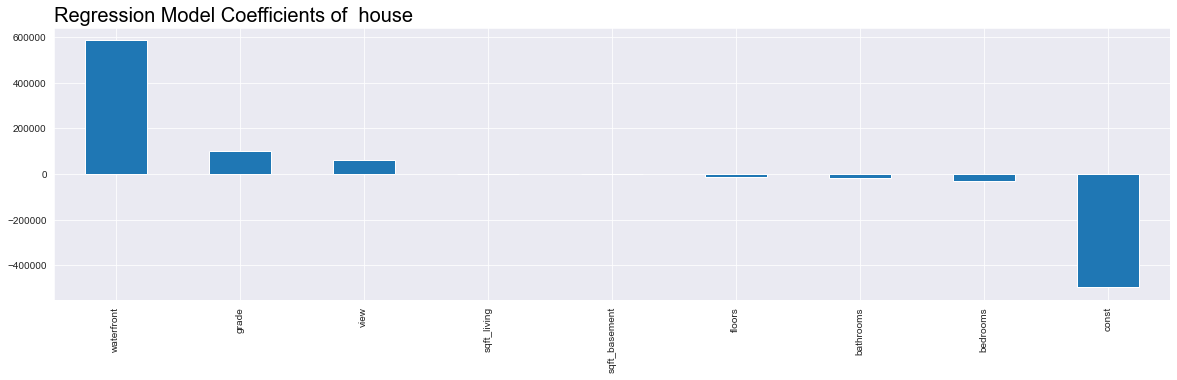

In [24]:
#Sorted Values bar plot_ eight variables
house_coeff_sorted.plot(kind='bar')
plt.title('Regression Model Coefficients of  house', fontsize='20', color='black', loc='left')

Text(0.0, 1.0, 'Scatter of price vs predicted price')

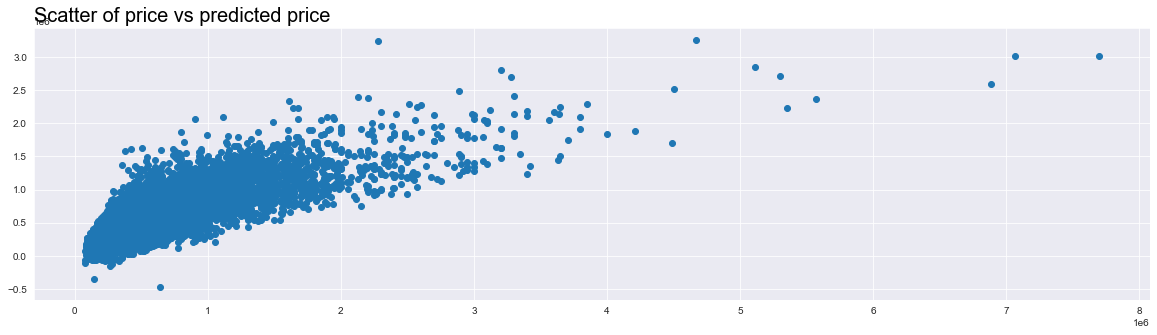

In [25]:
# price prediction with eight variables
predictprice = regression_model_house.predict(x)
plt.scatter(y, predictprice)
plt.title('Scatter of price vs predicted price', fontsize='20', color='black', loc='left')

In [26]:
# Create a new column in the dataframe house, called, 'Prediction'.
house['Prediction'] = regression_model_house.predict(x)
house['price'].corr(house['Prediction'])

0.7720864351459996

In [30]:
# price prediction with nine variables
predictprice = regression_model_house.predict(x)

Text(0.0, 1.0, 'Scatter of price vs predicted price')

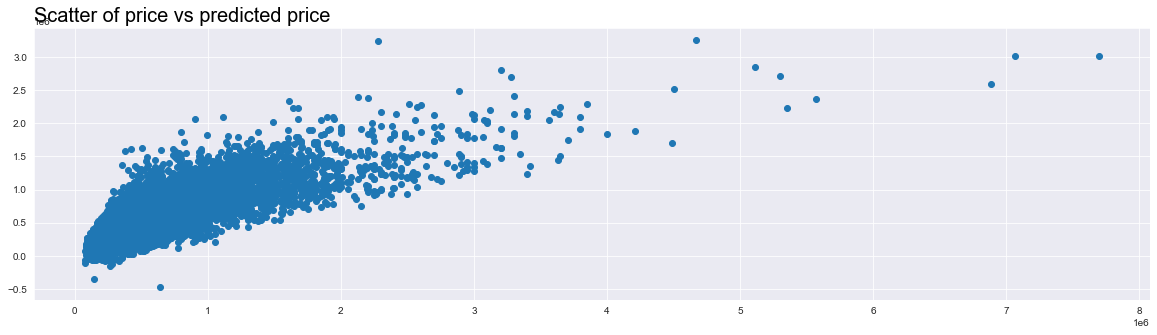

In [20]:
# Using prediction with nine variables
plt.scatter(y, predictprice)
plt.title('Scatter of price vs predicted price', fontsize='20', color='black', loc='left')

Text(0.5, 1.0, 'Scatter of price vs predicted price')

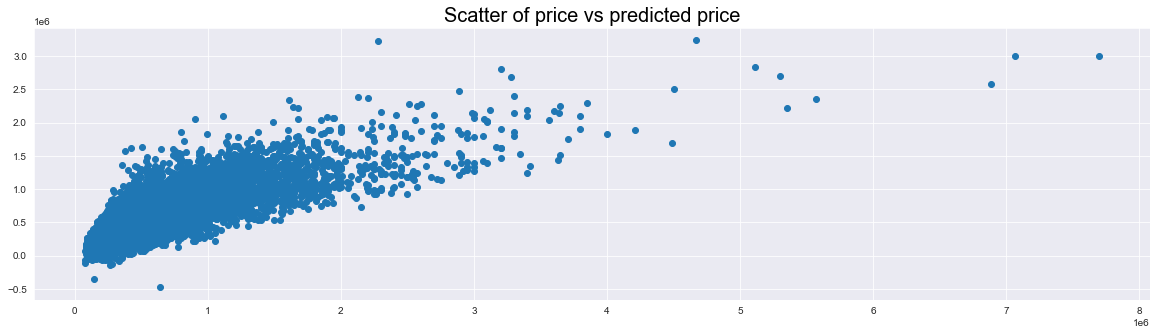

In [32]:
# Scatter of price vs predicted price
plt.scatter(y, predictprice)

plt.title('Scatter of price vs predicted price', fontsize='20', color='black')

In [37]:
# Create a new column in the dataframe house, called, 'Prediction'.
house['Prediction'] = regression_model_house.predict(x)
house['price'].corr(house['Prediction'])

0.7721172619101784

In [32]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [22]:
# Extract coefficients from regression model 
house3_coeff = (regression_model_house3.params)
house3_coeff

const           -260404.566103
bedrooms          -7062.613302
bathrooms        -21079.820107
sqft_living          64.135787
floors            22908.288311
waterfront        92954.238294
view              28040.292353
grade             71175.472218
sqft_basement        57.569314
sqft_living15        42.401748
dtype: float64

In [23]:
# Sort coefficients from regression model
house3_coeff_sorted = house3_coeff.sort_values(ascending=False)
house3_coeff_sorted

waterfront        92954.238294
grade             71175.472218
view              28040.292353
floors            22908.288311
sqft_living          64.135787
sqft_basement        57.569314
sqft_living15        42.401748
bedrooms          -7062.613302
bathrooms        -21079.820107
const           -260404.566103
dtype: float64

Text(0.5, 1.0, 'Regression Model Coefficients of  house3')

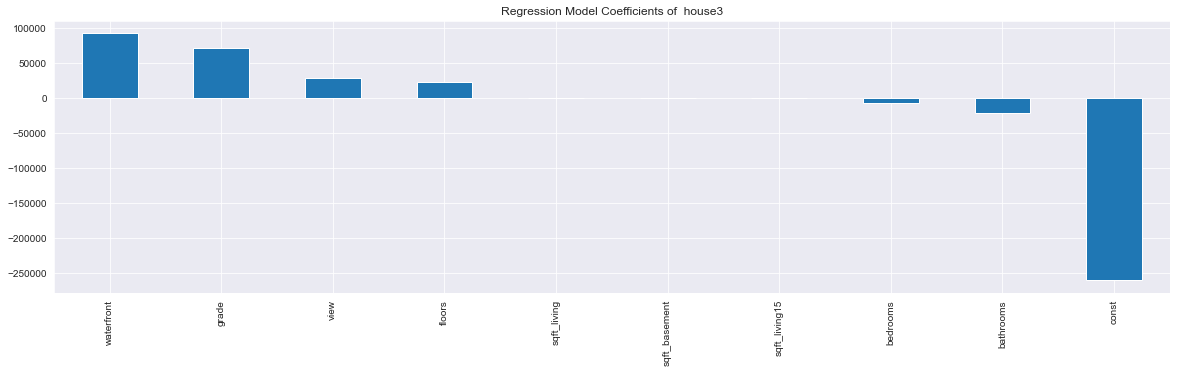

In [25]:
#Sorted Values bar plot
house3_coeff_sorted.plot(kind='bar')
plt.title('Regression Model Coefficients of  house3')

In [28]:
# Dummy variables with zipcode
# Adding location: Zipcode as string
house = pd.read_csv('kc_house_data.csv')
x=house.drop(['id','date', 'lat', 'long', 'condition', 'sqft_above', 'yr_built', 'yr_renovated','price', 'sqft_lot15'],axis=1)
pd.get_dummies(x)
x['zipcat']=x['zipcode'].astype(str)
x=x.drop(['zipcode'],axis=1)
x=pd.get_dummies(x)


In [29]:
# house dependent variable
y = house['price']
# Add constant to independent variables
x = sm.add_constant(x)
# Regression model house dataframe
regression_model_house = sm.OLS(y,x).fit() 
# Print summary
regression_model_house.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1116.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:50:40   Log-Likelihood:            -2.9001e+05
No. Observations:               21613   AIC:                         5.802e+05
Df Residuals:                   21533   BIC:                         5.808e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.401e+05   1.07e+04    -13.042      0.000   -1.61e+05   -1.19e+05
bedrooms      -2.395e+04   1543.391    -15.519      0.000    -2.7e+04   -2.09e+04
bathrooms      1.335e+04   2504.781      5.330      0.000    8439.987    1.83e+04
sqft_living     218.5988      2.985     73.234      0.000     212.748     224.449
sqft_lot          0.2076      0.029      7.042      0.000       0.150       0.265
floors         -6.48e+04   2990.234    -21.670      0.000   -7.07e+04   -5.89e+04
waterfront     6.707e+05   1.43e+04     46.914      0.000    6.43e+05    6.99e+05
view            5.86e+04   1770.847     33.094      0.000    5.51e+04    6.21e+04
grade          4.875e+04   1756.082     27.760      0.000    4.53e+04    5.22e+04
sqft_basement   -80.0851      3.652    -21.929      0.000     -87.243     -72.927
sqft_living15     9.0756      2.911      3.117      0.002       3.369      14.782
zipcat_98001  -2.147e+05   8552.403    -25.103      0.000   -2.31e+05   -1.98e+05
zipcat_98002  -1.733e+05   1.15e+04    -15.032      0.000   -1.96e+05   -1.51e+05
zipcat_98003  -2.277e+05   9702.134    -23.468      0.000   -2.47e+05   -2.09e+05
zipcat_98004   5.801e+05   9274.605     62.548      0.000    5.62e+05    5.98e+05
zipcat_98005   1.052e+05   1.26e+04      8.363      0.000    8.06e+04     1.3e+05
zipcat_98006   6.857e+04   7550.266      9.082      0.000    5.38e+04    8.34e+04
zipcat_98007   4.633e+04   1.36e+04      3.399      0.001    1.96e+04    7.31e+04
zipcat_98008   4.821e+04   9693.416      4.973      0.000    2.92e+04    6.72e+04
zipcat_98010  -1.412e+05   1.62e+04     -8.736      0.000   -1.73e+05    -1.1e+05
zipcat_98011  -9.158e+04   1.16e+04     -7.893      0.000   -1.14e+05   -6.88e+04
zipcat_98014  -1.232e+05   1.47e+04     -8.386      0.000   -1.52e+05   -9.44e+04
zipcat_98019  -1.322e+05   1.18e+04    -11.224      0.000   -1.55e+05   -1.09e+05
zipcat_98022  -2.179e+05   1.08e+04    -20.226      0.000   -2.39e+05   -1.97e+05
zipcat_98023  -2.469e+05   7325.692    -33.707      0.000   -2.61e+05   -2.33e+05
zipcat_98024  -5.685e+04   1.81e+04     -3.145      0.002   -9.23e+04   -2.14e+04
zipcat_98027  -4.091e+04   8090.329     -5.057      0.000   -5.68e+04   -2.51e+04
zipcat_98028  -9.169e+04   9645.567     -9.506      0.000   -1.11e+05   -7.28e+04
zipcat_98029    391.6945   9170.082      0.043      0.966   -1.76e+04    1.84e+04
zipcat_98030  -2.103e+05   1.01e+04    -20.735      0.000    -2.3e+05    -1.9e+05
zipcat_98031  -1.952e+05   9807.076    -19.907      0.000   -2.14e+05   -1.76e+05
zipcat_98032   -1.97e+05   1.45e+04    -13.630      0.000   -2.25e+05   -1.69e+05
zipcat_98033   1.603e+05   7866.592     20.383      0.000    1.45e+05    1.76e+05
zipcat_98034  -9893.8563   7023.492     -1.409      0.159   -2.37e+04    3872.709
zipcat_98038  -1.882e+05   6818.705    -27.593   